## Task 1

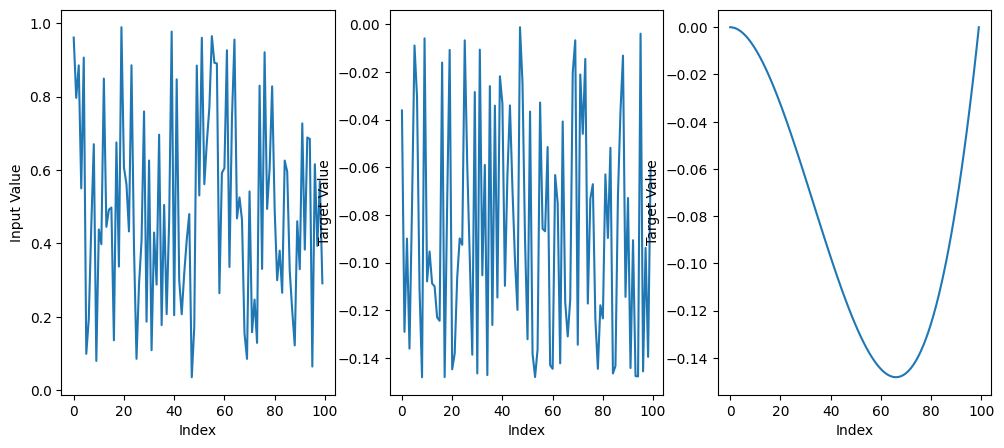

In [472]:
import numpy as np
import matplotlib.pyplot as plt

# generate 100 random number in [0,1)
x = np.random.rand(100)
control_x = np.linspace(0, 1, 100)


# calculate corresponding targets
t = [(entry**3 - entry**2) for entry in x]
control_t = [entry**3 - entry**2 for entry in control_x]

# create figure and set size
plt.figure(figsize=(12, 5))

#first subplot for input
plt.subplot(131)
plt.plot(range(100), x)
plt.xlabel("Index")
plt.ylabel("Input Value")

#second subplot for target
plt.subplot(132)
plt.plot(range(100), t)
plt.xlabel("Index")
plt.ylabel("Target Value")

#third subplot for target
plt.subplot(133)
plt.plot(range(100), control_t)
plt.xlabel("Index")
plt.ylabel("Target Value")

plt.show()

## Task 2

In [432]:
class Layer:
    def __init__(self, n_units: int, input_unit: int) -> None:
        """
        Instantiate a layer of perceptrons

        Args:
            n_units (int): Number of units (perceptrons) in the layer
            input_unit (int): Number of units in the previous layer
        """
        self.weights = (np.random.rand(input_unit, n_units) - 0.5) * 2
        self.bias = np.zeros(n_units)
        self.input = None
        self.preact = None
        self.act = None
    
    def compute_preactivation(self) -> None:
        """
        Compute preactivation by summing the weighted inputs and the bias
        """
        self.preact = self.input @ self.weights + self.bias

    def compute_activation(self) -> None:
        """
        Compute activation by applying an activation function (ReLu)
        """
        self.act = np.maximum(0, self.preact)

    def forward_step(self, input: np.array) -> np.array:
        """
        Given new input, compute a forward step for this layer

        Args:
            input (np.array): Input from the previous layer

        Returns:
            np.array: Output for the next layer
        """
        self.input = input
        self.compute_preactivation()
        self.compute_activation()
        return self.act

    def get_activation_derivative(self) -> np.array:
        """
        Get the derivative of the activation function (ReLu) for each neuron

        Returns:
            np.array: Array of the derivative for each neuron in the layer
        """
        return np.where(self.preact <= 0, 0, 1)

    def compute_gradients(self, error_gradient: np.array) -> None:
        """
        Compute and store the gradients given an error gradient

        Args:
            error_gradient (np.array): Error gradient that is propagated back 
                                       to this layer
        """
        self.activation_derivative = self.get_activation_derivative()
        self.bias_gradient = error_gradient * self.activation_derivative
        self.weight_gradient = np.outer(self.input, self.bias_gradient)
        self.input_gradient = self.bias_gradient @ self.weights.transpose()

    def update_parameters(self) -> None:
        """
        Update the weights and bias according to the respective gradients
        """
        learning_rate = 0.005
        self.weights = self.weights - learning_rate * self.weight_gradient
        self.bias = self.bias - learning_rate * self.bias_gradient

    def backward_step(self, error_gradient: np.array) -> np.array:
        """
        Compute a backward step for backpropagating through this layer

        Args:
            error_gradient (np.array): Error gradient that is propagated back 
                                       to this layer

        Returns:
            np.array: Array of error gradients for the previous layer
        """
        self.compute_gradients(error_gradient)
        self.update_parameters()
        return self.input_gradient


## Task 3

In [336]:
class MLP:
    def __init__(self, 
                input_dim: int,
                output_dim: int,
                hidden_layer_dims: np.array) -> None:
        self.layers = []

        # add hidden layers (input layer is implicit)
        previous_layer_dim = input_dim
        for layer_dim in hidden_layer_dims:
            self.layers.append(Layer(layer_dim, previous_layer_dim))
            previous_layer_dim = layer_dim
        
        # add output layer
        self.layers.append(Layer(output_dim, previous_layer_dim))

    def forward_step(self, input: np.array) -> np.array:
        layer_activation = input
        for layer in self.layers:
            layer_activation = layer.forward_step(layer_activation)
        return layer_activation

    def backpropagation(self, loss_gradient: float) -> None:
        error_gradient = loss_gradient
        for layer in reversed(self.layers):
            error_gradient = layer.backward_step(error_gradient)

## Task 4

In [492]:
def compute_loss(y: float, t: float) -> float:
    return 0.5 * (y - t)**2

def compute_loss_gradient(y: float, t: float) -> float:
    return y - t

network = MLP(1, 1, [10])

loss_history = []

for _ in range(1000):
    loss_entry = []
    # print("-"*50)
    for value, target in zip(x, t):
        output = network.forward_step([value])
        loss = compute_loss(output, target)
        loss_entry.append(loss)
        loss_gradient = compute_loss_gradient(output, target)
        network.backpropagation(loss_gradient)
        loss_entry.append(loss)
    loss_history.append(loss_entry)




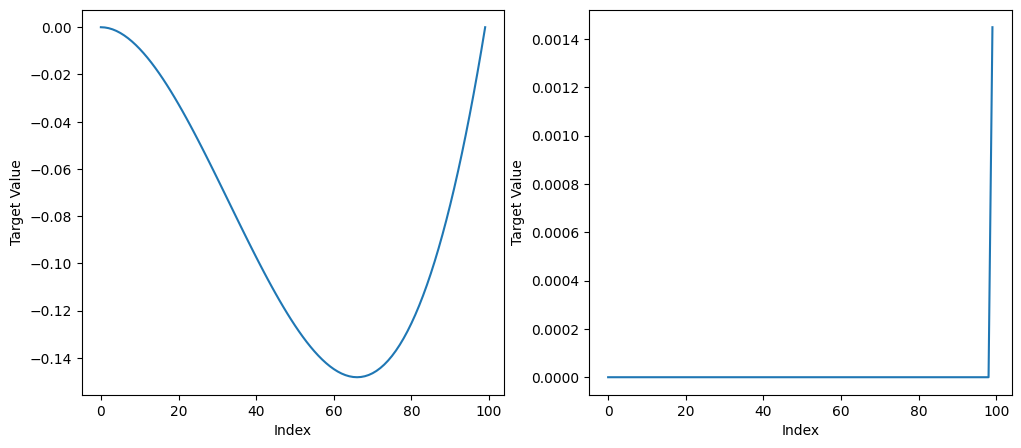

In [481]:

outputs = [network.forward_step([value]) for value in control_x]

# create figure and set size
plt.figure(figsize=(12, 5))

#first subplot for input
plt.subplot(121)
plt.plot(range(100), control_t)
plt.xlabel("Index")
plt.ylabel("Target Value")

#second subplot for target
plt.subplot(122)
plt.plot(range(100), outputs)
plt.xlabel("Index")
plt.ylabel("Target Value")

plt.show()

Obviously, the MLP is not able to learn the given function. This is due to the MLP's inability to output negative values (due to the ReLu function). When taking the absolute value of the function (so that every value is positive), the network is able to learn at least some kind of a representation.

## Task 5

Text(0, 0.5, 'Average loss')

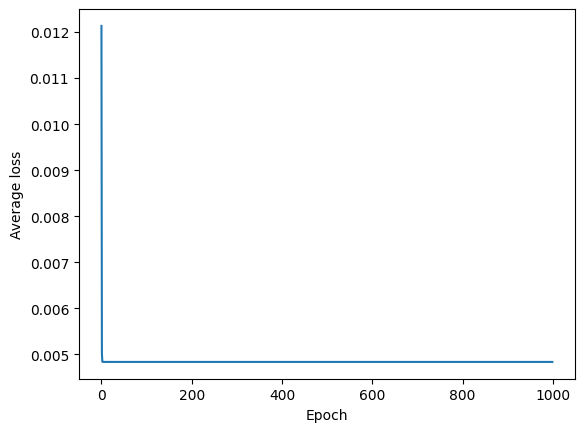

In [491]:
loss_mean = [sum(loss_entry) / len(loss_entry) for loss_entry in loss_history]

plt.plot(loss_mean)
plt.xlabel("Epoch")
plt.ylabel("Average loss")